In [18]:
import pandas as pd
import scipy
import seaborn
import scipy.cluster.hierarchy as sch
import numpy as np

<AxesSubplot:>

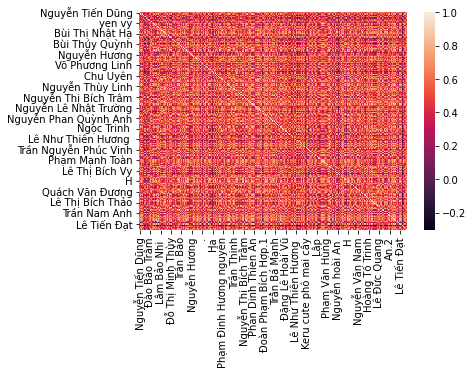

In [19]:
df = pd.read_csv("Corr_Matrix//demo_rs.csv")
seaborn.heatmap(df.corr())

In [20]:
def cluster_corr(corr_array, inplace=False):
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [21]:
cluster = cluster_corr(df.corr())
print(cluster)
cluster.to_csv("Cluster.csv")

                       Trần Phạm Phương Anh         Ha  Nguyễn Thu Thảo  \
Trần Phạm Phương Anh                1.000000  0.184954         0.364554   
Ha                                  0.184954  1.000000         0.479735   
Nguyễn Thu Thảo                     0.364554  0.479735         1.000000   
.                                   0.579534  0.343600         0.576606   
NtHK                                0.796590  0.282876         0.417961   
...                                      ...       ...              ...   
Hoàng Mai Thảo                      0.106194  0.297695         0.306506   
Trần Bảo Khanh                      0.077066  0.258406         0.277668   
Đặng Thị Minh Thư                   0.083689  0.054413         0.361665   
Trâm Anh                            0.314426  0.228399         0.298039   
Võ Phương Linh                      0.247390  0.153972         0.291313   

                              .      NtHK  Lê Linh Minh  Nguyễn Đình Quốc Ân  \
Trần Phạm Phương An

<AxesSubplot:>

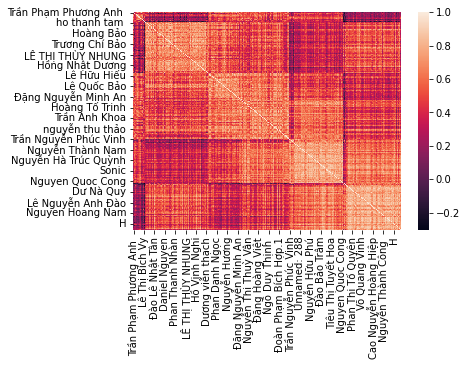

In [22]:
seaborn.heatmap(cluster)

In [ ]:
import pandas as pd
import scipy.cluster.hierarchy as spc


corr = df.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
